# loss, perp をプロット



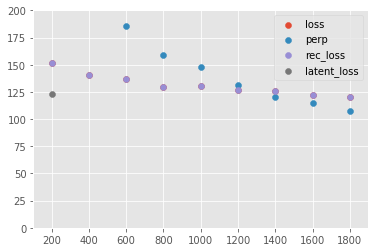

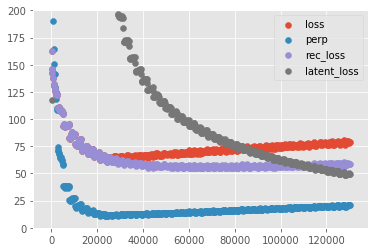

In [3]:
%matplotlib inline

#coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
import os
import json
plt.style.use('ggplot') 

# グラフ
def plot_loss_perp(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = [d["iteration"] for d in log]
    epoch = [d["epoch"] for d in log]
    loss = [d["main/loss"] for d in log]
    perp = [d["main/perp"] for d in log]
    
    plt.scatter(iter, loss, label="loss")
    plt.scatter(iter, perp, label="perp")
    
    try:
        rec_loss = [d["main/rec"] for d in log]
        latent_loss = [d["main/lat"] for d in log]
        plt.scatter(iter, rec_loss, label="rec_loss")
        plt.scatter(iter, latent_loss, label="latent_loss")
    except:
        pass
    
    plt.legend()
    plt.ylim([0, 200])
    plt.show()

plot_loss_perp()
#plot_loss_perp(result_dir = 'result_ae_0121/')
#plot_loss_perp(result_dir = 'result_ae_0123/')
plot_loss_perp(result_dir = 'result_0208_C041/')


# bleu, rouge-l (p, r, f)をプロット

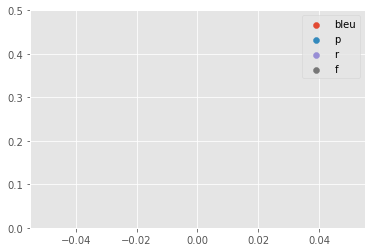

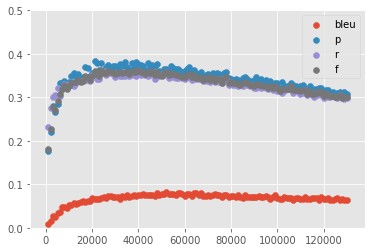

In [4]:
def plot_bleu(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = []
    bleu = []
    p = []
    r = []
    f = []
    for d in log:
        if "bleu" in d:
            iter.append(d["iteration"])
            bleu.append(d["bleu"])
            p.append(d["p"])
            r.append(d["r"])
            f.append(d["f"])
    
    plt.scatter(iter, bleu, label="bleu")
    plt.scatter(iter, p, label="p")
    plt.scatter(iter, r, label="r")
    plt.scatter(iter, f, label="f")
    plt.legend()
    plt.ylim([0.0, 0.5])
    plt.show()
    
plot_bleu()
plot_bleu(result_dir = 'result_0208_C041/')


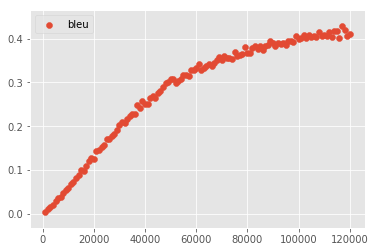

In [28]:
def plot_bleu_old(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = []
    bleu = []
    for d in log:
        if "validation/main/bleu" in d:
            iter.append(d["iteration"])
            bleu.append(d["validation/main/bleu"])
    
    plt.scatter(iter, bleu, label="bleu")
    plt.legend()
    plt.show()
    
plot_bleu_old(result_dir = 'result_ae_0120')